### Idalee Vargas 

#### Jan 25, 2024

# 0.) Clean the Apple Data to get a quarterly series of EPS.

In [47]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt

In [48]:
y = pd.read_csv('AAPL_quarterly_financials.csv') 

In [49]:
y.head()

,name,ttm,09/30/2023,06/30/2023,03/31/2023,12/31/2022,09/30/2022,06/30/2022,03/31/2022,12/31/2021,...,12/31/1987,09/30/1987,06/30/1987,03/31/1987,12/31/1986,09/30/1986,06/30/1986,03/31/1986,12/31/1985,09/30/1985
0,TotalRevenue,"383,285,000,000","89,498,000,000","81,797,000,000","94,836,000,000","117,154,000,000","90,146,000,000","82,959,000,000","97,278,000,000","123,945,000,000",...,"1,042,400,000","786,500,000","637,100,000","575,300,000","662,300,000","510,800,000","448,300,000","408,900,000","533,900,000","409,700,000"
1,\tOperatingRevenue,"383,285,000,000","89,498,000,000","81,797,000,000","94,836,000,000","117,154,000,000","90,146,000,000","82,959,000,000","97,278,000,000","123,945,000,000",...,"1,042,400,000","786,500,000","637,100,000","575,300,000","662,300,000","510,800,000","448,300,000","408,900,000","533,900,000","409,700,000"
2,CostOfRevenue,"214,137,000,000","49,071,000,000","45,384,000,000","52,860,000,000","66,822,000,000","52,051,000,000","47,074,000,000","54,719,000,000","69,702,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GrossProfit,"169,148,000,000","40,427,000,000","36,413,000,000","41,976,000,000","50,332,000,000","38,095,000,000","35,885,000,000","42,559,000,000","54,243,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OperatingExpense,"54,847,000,000","13,458,000,000","13,415,000,000","13,658,000,000","14,316,000,000","13,201,000,000","12,809,000,000","12,580,000,000","12,755,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# Clean data 
y.index = y.name

In [51]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]

In [52]:
y.index = pd.to_datetime(y.index)

In [53]:
# Assumptions NULLS are 0.
y = y.fillna(0.).sort_index()

# 1.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data. Clean it to have a quarterly average.

In [54]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["iPhone", "Apple Layoffs","MacBook","iPad","Apple CEO", 
            "Apple Share Price", "Recession", "Cellphone","iPod","Computer",
           "Taylor Swift","Samsung","Is the Earth Flat","Burgers","Hospital"]  
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [55]:
X = df.resample("Q").mean()

In [56]:
temp = pd.concat([y,X], axis = 1).dropna()
y = temp["BasicEPS"].copy()
X = temp.iloc[:,1:].copy()

# 2.) Normalize all the X data

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()

In [59]:
X_scaled = scaler.fit_transform(X)

# 3.) Run a Lasso with lambda of .5. Plot a bar chart.

In [62]:
from sklearn.linear_model import Lasso 

In [63]:
lasso = Lasso(alpha = .1)

lasso.fit(X_scaled, y) 

Lasso(alpha=0.1)

In [64]:
coefficients = lasso.coef_

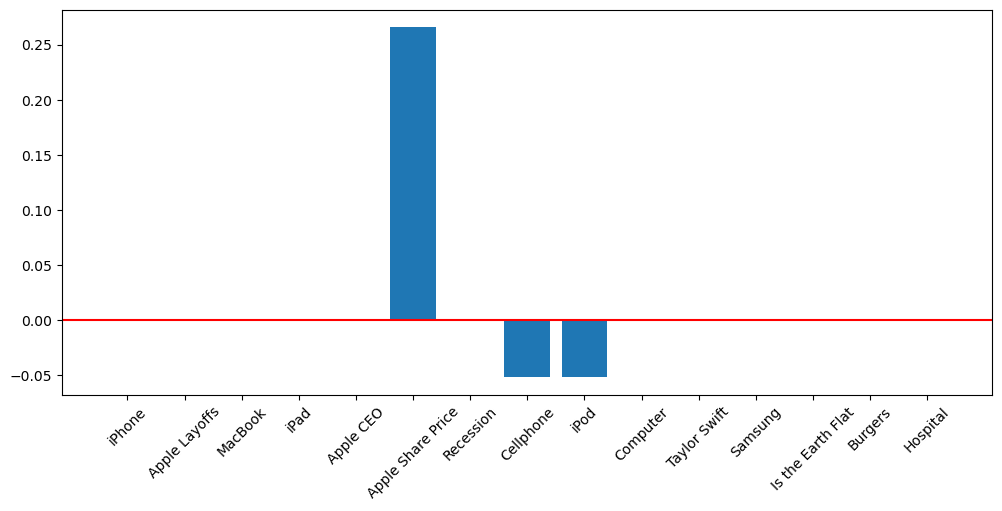

In [67]:
plt.figure(figsize = (12,5)) 
plt.bar(range(len(coefficients)), coefficients,
        tick_label = X.columns)
plt.xticks(rotation=45)
plt.axhline(0., color = "red") 
plt.show()

# 5.) Do these coefficient magnitudes make sense?

Considering what we can observe in the graph, we can conclude that the maginitudes make sense. During that year, the *MacBook* was not yet in the market, as well as the first *iPhones* nor *iPads*. However, it is important to observe that during that day the *Apple Share Price* had a big positive magnitude. On the other hand, *Cellphone* and *iPod* also show and observable magnitude, but a negative one. The rest of the coefficient magnitudes are not observable since the values are close to 0. Nevertheless, it was expected that *Apple CEO* would have a bigger magnitude. 